[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


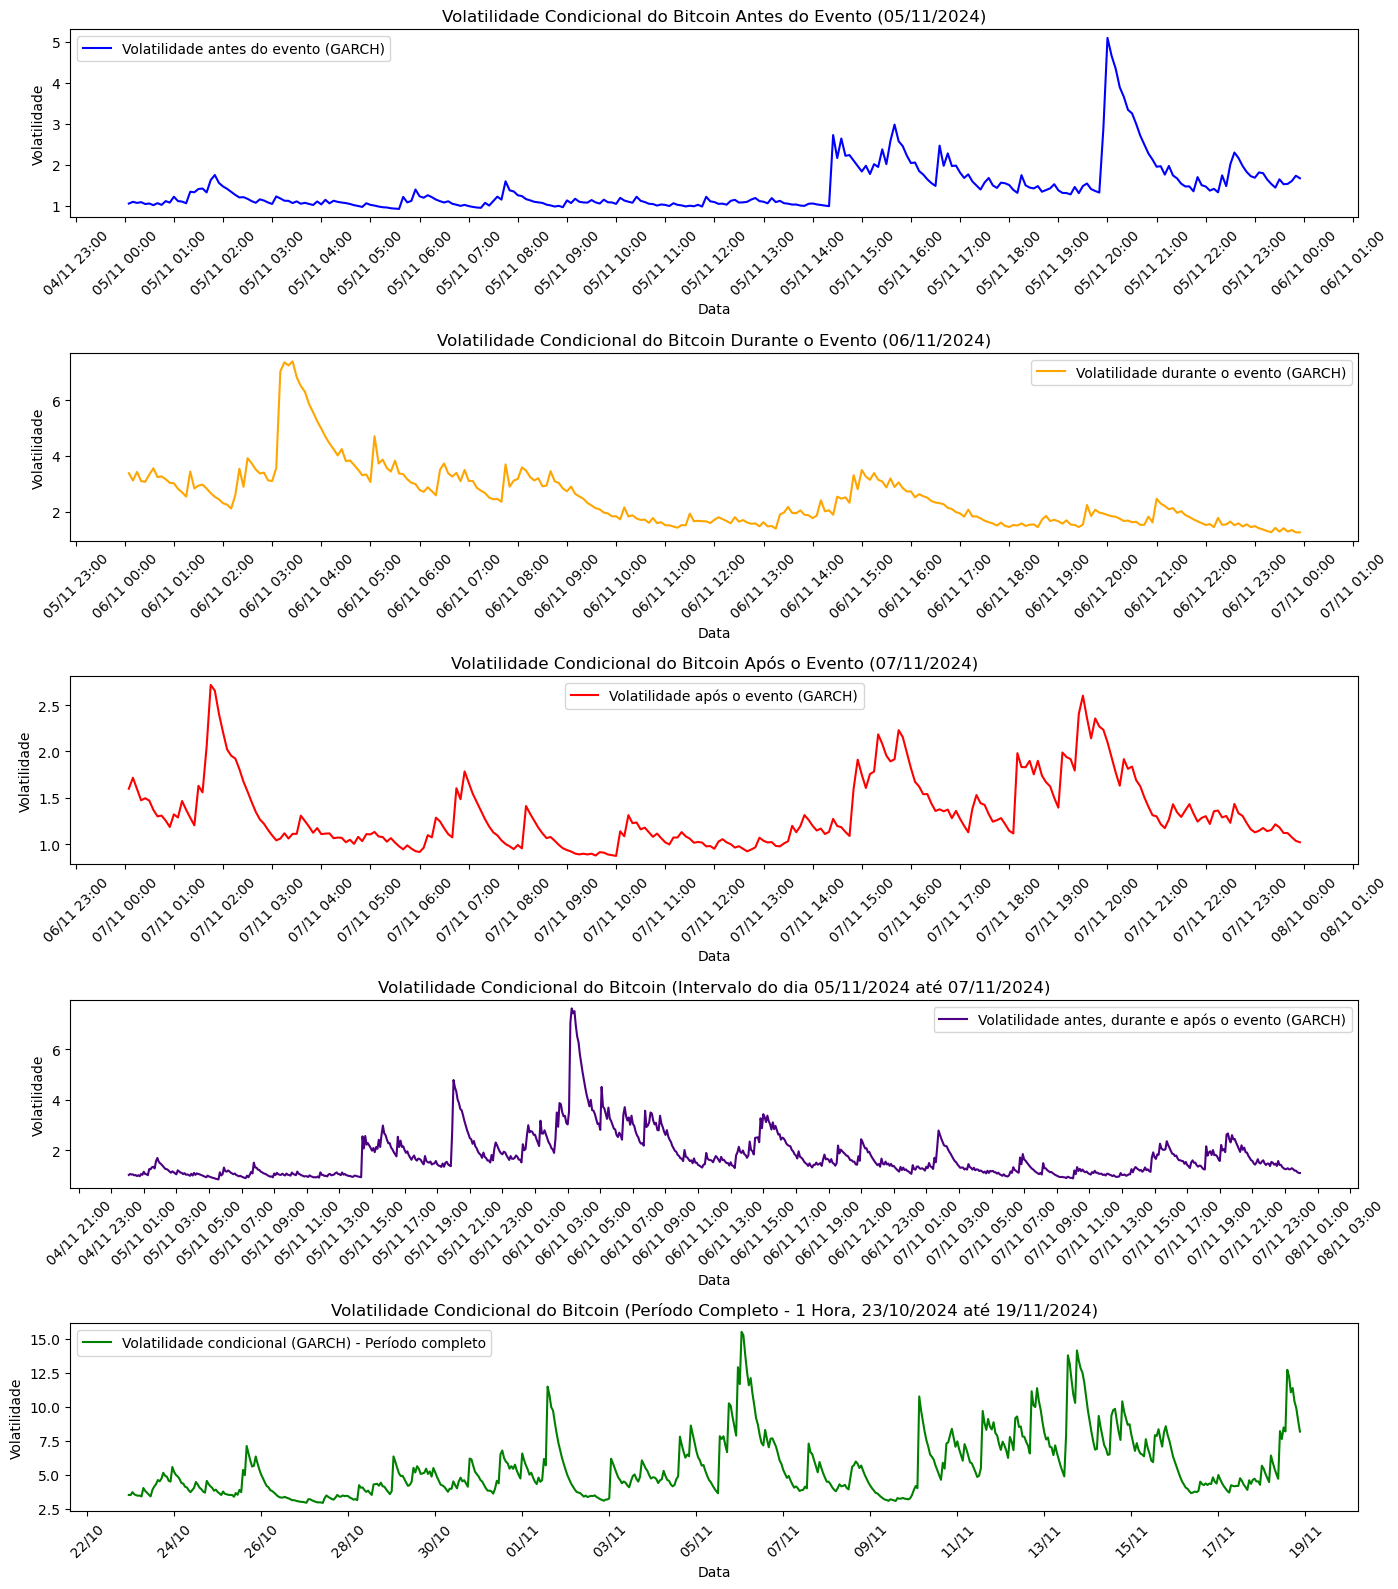

In [131]:
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
import matplotlib.dates as mdates

# Coletar dados históricos do Bitcoin com intervalo de 5 minutos antes, durante e após o evento
dados_antes_evento = yf.download('BTC-USD', start='2024-11-05', end='2024-11-06', interval='5m')
dados_durante_evento = yf.download('BTC-USD', start='2024-11-06', end='2024-11-07', interval='5m')
dados_depois_evento = yf.download('BTC-USD', start='2024-11-07', end='2024-11-08', interval='5m')
dados_antes_durante_depois_evento = yf.download('BTC-USD', start='2024-11-05', end='2024-11-08', interval='5m')

# Baixar dados históricos do Bitcoin (BTC-USD) com intervalo de 1 hora
dados_intervalo_evento = yf.download('BTC-USD', start='2024-10-23', end='2024-11-19', interval='1h')

# Calcular os retornos percentuais para cada período
dados_antes_evento['Retornos'] = dados_antes_evento['Close'].pct_change() * 100
dados_durante_evento['Retornos'] = dados_durante_evento['Close'].pct_change() * 100
dados_depois_evento['Retornos'] = dados_depois_evento['Close'].pct_change() * 100
dados_intervalo_evento['Retornos'] = dados_intervalo_evento['Close'].pct_change() * 100
dados_antes_durante_depois_evento['Retornos'] = dados_antes_durante_depois_evento['Close'].pct_change() * 100

# Remover valores nulos (NaN)
dados_antes_evento.dropna(inplace=True)
dados_durante_evento.dropna(inplace=True)
dados_depois_evento.dropna(inplace=True)
dados_intervalo_evento.dropna(inplace=True)
dados_antes_durante_depois_evento.dropna(inplace=True)

# Ajuste de escala mais forte, multiplicando por 10 para melhorar a convergência
dados_antes_evento['Retornos'] = dados_antes_evento['Retornos'] * 10
dados_durante_evento['Retornos'] = dados_durante_evento['Retornos'] * 10
dados_depois_evento['Retornos'] = dados_depois_evento['Retornos'] * 10
dados_intervalo_evento['Retornos'] = dados_intervalo_evento['Retornos'] * 10
dados_antes_durante_depois_evento['Retornos'] = dados_antes_durante_depois_evento['Retornos'] * 10

# Ajustar o modelo GARCH para os retornos do Bitcoin durante os três períodos
modelo_antes_evento = arch_model(dados_antes_evento['Retornos'], vol='Garch', p=1, q=2)
resultado_garch_antes_evento = modelo_antes_evento.fit(disp="off")

modelo_durante_evento = arch_model(dados_durante_evento['Retornos'], vol='Garch', p=1, q=2)
resultado_garch_durante = modelo_durante_evento.fit(disp="off")

modelo_depois_evento = arch_model(dados_depois_evento['Retornos'], vol='Garch', p=1, q=2)
resultado_garch_depois = modelo_depois_evento.fit(disp="off")

# Ajustar o modelo GARCH para os dados combinados (antes, durante e após o evento)
modelo_antes_durante_depois_evento = arch_model(dados_antes_durante_depois_evento['Retornos'], vol='Garch', p=1, q=2)
resultado_garch_dados_antes_durante_depois = modelo_antes_durante_depois_evento.fit(disp="off")

# Ajustar o modelo GARCH para os retornos no período completo de 1 hora
modelo_completo = arch_model(dados_intervalo_evento['Retornos'], vol='Garch', p=1, q=1)
resultado_garch_completo = modelo_completo.fit(disp="off")

# Plotar a volatilidade condicional estimada (volatilidade do GARCH)
plt.figure(figsize=(14, 16))

# Volatilidade antes do evento (intervalo de 5 minutos)
plt.subplot(5, 1, 1)
plt.plot(dados_antes_evento.index, resultado_garch_antes_evento.conditional_volatility, label='Volatilidade antes do evento (GARCH)', color='blue')
plt.title('Volatilidade Condicional do Bitcoin Antes do Evento (05/11/2024)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalo de 2 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.legend()

# Volatilidade durante o evento (intervalo de 5 minutos)
plt.subplot(5, 1, 2)
plt.plot(dados_durante_evento.index, resultado_garch_durante.conditional_volatility, label='Volatilidade durante o evento (GARCH)', color='orange')
plt.title('Volatilidade Condicional do Bitcoin Durante o Evento (06/11/2024)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalo de 2 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.legend()

# Volatilidade após o evento (intervalo de 5 minutos)
plt.subplot(5, 1, 3)
plt.plot(dados_depois_evento.index, resultado_garch_depois.conditional_volatility, label='Volatilidade após o evento (GARCH)', color='red')
plt.title('Volatilidade Condicional do Bitcoin Após o Evento (07/11/2024)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalo de 2 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.legend()

# Volatilidade para os dados combinados (antes, durante e após o evento)
plt.subplot(5, 1, 4)
plt.plot(dados_antes_durante_depois_evento.index, resultado_garch_dados_antes_durante_depois.conditional_volatility, label='Volatilidade antes, durante e após o evento (GARCH)', color='indigo')
plt.title('Volatilidade Condicional do Bitcoin (Intervalo do dia 05/11/2024 até 07/11/2024)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Intervalo de 2 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.legend()

# Volatilidade para o período completo (intervalo de 1 hora)
plt.subplot(5, 1, 5)
plt.plot(dados_intervalo_evento.index, resultado_garch_completo.conditional_volatility, label='Volatilidade condicional (GARCH) - Período completo', color='green')
plt.title('Volatilidade Condicional do Bitcoin (Período Completo - 1 Hora, 23/10/2024 até 19/11/2024)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=48))  # Intervalo de 2 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.xticks(rotation=45)  # Inclina as labels do eixo X
plt.legend()

plt.tight_layout()
plt.show()